<a href="https://colab.research.google.com/github/Samuellucas97/pandas-zero/blob/master/en/notebooks/Combining_Information_From_Multiple_Bases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concatenating multiples bases




In some situations, the information that we need is divided intro databases with identify format.  

In these cases, we can **concat** this bases.  

The follow example investigates the diversity on the UFRN courses. 

Our information source for this example is datasets about join students at UFRN, which is organized by per year of entry.  

## Collecting the data

The first step when we have differents sources is to collect in the most automated way possible.  

In these example, we organized the links for the student datas in a dictionary.  

In the following example, each key is a year and your associated value is the link to the corresponding dataset:

In [0]:
csv_students = {
    2019: "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/a55aef81-e094-4267-8643-f283524e3dd7/download/discentes-2019.csv",
    2018: "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/146b749b-b9d0-49b2-b114-ac6cc82a4051/download/discentes-2018.csv",
    2017: "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dc732572-a51a-4d4a-a39d-2db37cbe5382/download/discentes-2017.csv",
    2016: "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/7d2fa5b3-743f-465f-8450-91719b34a002/download/discentes-2016.csv",
    2015: "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/e2b5b843-4f58-497e-8979-44daf8df8f94/download/discentes-2015.csv",
    2014: "http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/6c23a430-9a7c-4d0f-9602-1d5d97d40e6a/download/discentes-2014.csv",
}

We can consume each dataset using the `pd.read_csv()` method.  

The Python allows that this method can be apllied for all links in sequence using **comprehension list**, with the notation:

```python3
pd.read_csv(dicionário[chave]) for chave in dicionário
```

Understanding the code above, we ask Python to apply the method `pd.read_csv(dicionário[chave])` for each key in the dictionary.  
  
The produced list contains a `DataFrame` for each year.  

The method `pd.concat()` combinate all these dataframes in only one:

In [0]:
import pandas as pd

In [0]:
data = pd.concat(pd.read_csv(csv_students[year], sep=";") for year in csv_students)
data.head(n=2)

,matricula,nome_discente,sexo,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,20193012209,ABDENOR BEZERRA DOS SANTOS,M,2019,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
1,20190088900,ABDIAS MONTEIRO DE ANDRADE MELO,M,2019,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,111635060.0,HISTÓRIA,PRESENCIAL,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ


Now that we already unified the dataset, let´s save it toward we don´t need to redo this process each time.   

One of ways of **to persist** a `DataFrame` is to use the `to_csv()` method that save the data in an CSV file:  

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data.to_csv("/content/drive/My Drive/discentes-ufrn-2014-2019.csv", index=False)

## Evaluating the diversity at IMD

We start our analysis from the IMD data.

We make this selection filtering by the field `nome_unidade`: 




In [0]:
data_imd = data.query("nome_unidade == 'INSTITUTO METROPOLE DIGITAL'")
data_imd.shape

(10080, 17)

A very common operation into databases is calculate statistics that need group the data.

At the Pandas, we can do this using the method `groupby()` of `DataFrame` type object.

The below example calculate the quantity of observations every year, this is, the number of newcomers at the IMD courses between 2014 and 2019.

Before, however, we need to verify if it has missing data in those columns:



In [0]:
data_imd.isnull().sum()

matricula               0
nome_discente           0
sexo                    0
ano_ingresso            0
periodo_ingresso        0
forma_ingresso          0
tipo_discente           0
status                  0
sigla_nivel_ensino      0
nivel_ensino            0
id_curso                0
nome_curso              0
modalidade_educacao     0
id_unidade              0
nome_unidade            0
id_unidade_gestora      0
nome_unidade_gestora    0
dtype: int64

As we have no missing data, we can proceed with the analysis:

In [0]:
data_imd.groupby("ano_ingresso").size()

ano_ingresso
2014    1809
2015    1885
2016    1728
2017    2382
2018    1140
2019    1136
dtype: int64

We can too agroup considering multiple data carachteristics:

In [0]:
data_imd.groupby(["nome_curso","ano_ingresso","sexo"]).size()

nome_curso                                                                      ano_ingresso  sexo 
CURSO TÉCNICO DA METRÓPOLE DIGITAL                                              2014          F         408
                                                                                              M        1127
                                                                                2015          F         406
                                                                                              M        1115
                                                                                              false       1
                                                                                2016          F         302
                                                                                              M        1028
                                                                                2017          F         709
                                    

To verify the existence of **invalid data**:
 

In [0]:
data_imd = data_imd.query("sexo in ['M','F']")
data_imd.shape

(10079, 17)

In [0]:
data_imd.groupby(["nome_curso","ano_ingresso","sexo"]).size()

nome_curso                                                                      ano_ingresso  sexo
CURSO TÉCNICO DA METRÓPOLE DIGITAL                                              2014          F        408
                                                                                              M       1127
                                                                                2015          F        406
                                                                                              M       1115
                                                                                2016          F        302
                                                                                              M       1028
                                                                                2017          F        709
                                                                                              M       1268
                                             

Let's restrict our analysis to the Bachelor of Information Technology (BTI).

We do it filtering the data by the characteristic `nome_curso`:

In [0]:
data_bti = data_imd.query("nome_curso == 'TECNOLOGIA DA INFORMAÇÃO'")

In [0]:
aggregated_bti = data_bti.groupby(["ano_ingresso","sexo"]).size()
aggregated_bti

ano_ingresso  sexo
2014          F        29
              M       245
2015          F        39
              M       294
2016          F        31
              M       318
2017          F        28
              M       303
2018          F        44
              M       297
2019          F        35
              M       314
dtype: int64

As the number of newcomers varies, is just possible to compare different years in relative terms.

For that, Pandas offers the method `crosstab`, which option `normalize` determines if the counting of frequency will be normalized and how.

In this case, the normalization will be made by the characteristic horizontally listed (indexes):

In [0]:
percentage_bti = pd.crosstab(data_bti["ano_ingresso"], data_bti["sexo"], normalize="index")
percentage_bti

sexo,F,M
ano_ingresso,,
2014,0.105839,0.894161
2015,0.117117,0.882883
2016,0.088825,0.911175
2017,0.084592,0.915408
2018,0.129032,0.870968
2019,0.100287,0.899713


Note that now the sum of each possible value for the characteristic `sexo` on a given year is equals to 1 (which represents 100% of the data of that year).

We're not so good on diversity in BTI, huh? :(

Let's generate a graphic of lines to view a evolution of this (lack of) diversity over the considered years.

For this, besides the `matplotlib`, we'll need the library `seaborn`.

By convention, we import the library `seaborn` as `sns` e use the method `set()` to active the default settings.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

We made the line graph using the method `lineplot`, where we must inform, through the argument `data`, the data that we intend to plot.

Besides that, let's associate a name to the line's graph to be able to configurate the interval used in axis y through the method `set(ylim=(start, end))`:

Text(0.5, 1.0, 'Female students per year joined')

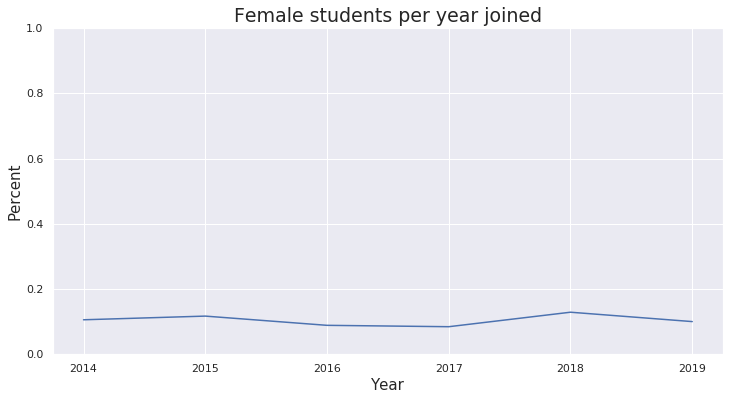

In [0]:
percentage_bti_female = percentage_bti["F"]
plt.figure(figsize=(12,6))
plot_bti = sns.lineplot(data=percentage_bti_female)
plot_bti.set(ylim=(0,1))
plt.xlabel("Year", fontsize=15)
plt.ylabel("Percent", fontsize=15)
plt.title("Female students per year joined", fontsize=19)

## Assesing the courses assoaciate the BTI 

The above data is clearly unsatisfactory, but it needs to be analyzed in perspective.

Initially, let's compare it with courses of second cycle of BTI.

In [0]:
courses_ti = ["TECNOLOGIA DA INFORMAÇÃO","ENGENHARIA DE SOFTWARE","CIÊNCIA DA COMPUTAÇÃO"]
data_ti = data.query(f"nome_curso in {courses_ti}")

To start, let's check if the present values on this dataframe respect the listed possibilities for the characteristic `sexo`:

In [0]:
data_ti.isnull().sum()

matricula               0
nome_discente           0
sexo                    0
ano_ingresso            0
periodo_ingresso        0
forma_ingresso          0
tipo_discente           0
status                  0
sigla_nivel_ensino      0
nivel_ensino            0
id_curso                0
nome_curso              0
modalidade_educacao     0
id_unidade              0
nome_unidade            0
id_unidade_gestora      0
nome_unidade_gestora    0
dtype: int64

In [0]:
data_ti.sexo.unique()

array(['M', 'F'], dtype=object)

Now we can calculate the absolut e relative values for each of the these courses:

In [0]:
aggregated_ti = data_ti.groupby(['nome_curso','ano_ingresso','sexo']).size()
aggregated_ti

nome_curso                ano_ingresso  sexo
CIÊNCIA DA COMPUTAÇÃO     2016          F         1
                                        M         3
                          2017          F         3
                                        M        11
                          2018          F         6
                                        M        21
                          2019          M        11
ENGENHARIA DE SOFTWARE    2016          F         1
                                        M         5
                          2017          F         3
                                        M        13
                          2018          F         2
                                        M        26
                          2019          F         6
                                        M        21
TECNOLOGIA DA INFORMAÇÃO  2014          F        29
                                        M       245
                          2015          F        39
                   

In [0]:
percentage_ti = pd.crosstab([data_ti['nome_curso'], data_ti['ano_ingresso']], data_ti['sexo'], normalize="index")
percentage_ti

sexo                                          F         M
nome_curso               ano_ingresso                    
CIÊNCIA DA COMPUTAÇÃO    2016          0.250000  0.750000
                         2017          0.214286  0.785714
                         2018          0.222222  0.777778
                         2019          0.000000  1.000000
ENGENHARIA DE SOFTWARE   2016          0.166667  0.833333
                         2017          0.187500  0.812500
                         2018          0.071429  0.928571
                         2019          0.222222  0.777778
TECNOLOGIA DA INFORMAÇÃO 2014          0.105839  0.894161
                         2015          0.117117  0.882883
                         2016          0.088825  0.911175
                         2017          0.084592  0.915408
                         2018          0.129032  0.870968
                         2019          0.100287  0.899713

Note that for computer science and software engineer courses there's no data for the years 2014 and 2015.

Besides that, there was no entry of female students in computer science in 2019.

So let's consider the data for male gender since 2016:

In [0]:
percentage_ti_male = percentage_ti.query("ano_ingresso >= 2016")["M"]
percentage_ti_male

nome_curso                ano_ingresso
CIÊNCIA DA COMPUTAÇÃO     2016            0.750000
                          2017            0.785714
                          2018            0.777778
                          2019            1.000000
ENGENHARIA DE SOFTWARE    2016            0.833333
                          2017            0.812500
                          2018            0.928571
                          2019            0.777778
TECNOLOGIA DA INFORMAÇÃO  2016            0.911175
                          2017            0.915408
                          2018            0.870968
                          2019            0.899713
Name: M, dtype: float64

A series produced from a set of multiple characteristics presents a hierarchical index.

The Pandas allows to convert a series like that in a dataframe using the method `reset_index()`

The names of the columns are reused from the hierarchical index. The last column can be named using the argument `name`:

In [0]:
data_ti_male = percentage_ti_male.reset_index(name="total")
data_ti_male

,nome_curso,ano_ingresso,total
0,CIÊNCIA DA COMPUTAÇÃO,2016,0.750000
1,CIÊNCIA DA COMPUTAÇÃO,2017,0.785714
2,CIÊNCIA DA COMPUTAÇÃO,2018,0.777778
3,CIÊNCIA DA COMPUTAÇÃO,2019,1.000000
4,ENGENHARIA DE SOFTWARE,2016,0.833333
5,ENGENHARIA DE SOFTWARE,2017,0.812500
6,ENGENHARIA DE SOFTWARE,2018,0.928571
7,ENGENHARIA DE SOFTWARE,2019,0.777778
8,TECNOLOGIA DA INFORMAÇÃO,2016,0.911175
9,TECNOLOGIA DA INFORMAÇÃO,2017,0.915408


With the organized data, now we can calculate the average of male participation on the courses associated to the BTI considering the period 2016-2019:

In [0]:
data_ti_male.groupby("nome_curso").mean()

,ano_ingresso,total
nome_curso,,
CIÊNCIA DA COMPUTAÇÃO,2017.5,0.828373
ENGENHARIA DE SOFTWARE,2017.5,0.838046
TECNOLOGIA DA INFORMAÇÃO,2017.5,0.899316


Note that is also being calculated the average of the column `ano_ingresso`.

It happens because, when reading the datasets from UFRN, the Pandas noticed that should configurate the column as numeric.

If we want to avoid this, we should use the Pandas to treat this columns as a ordinal resource:

In [0]:
data_ti_male.ano_ingresso = data_ti_male.ano_ingresso.astype(str)
data_ti_male.groupby("nome_curso").mean()

,total
nome_curso,
CIÊNCIA DA COMPUTAÇÃO,0.828373
ENGENHARIA DE SOFTWARE,0.838046
TECNOLOGIA DA INFORMAÇÃO,0.899316


In mean, the three courses present a unsatisfactory diversity. However, it's clear that the courses from the second cycle present a less critical situation than the BTI.

Let's look the evolution of this fact on the three courses using the `lineplot()` one more time.

On this example, let's configure the size of the graph using the method `plt.figure(figsize=(largura, altura))`.

Text(0.5, 1.0, 'Male students per year joined')

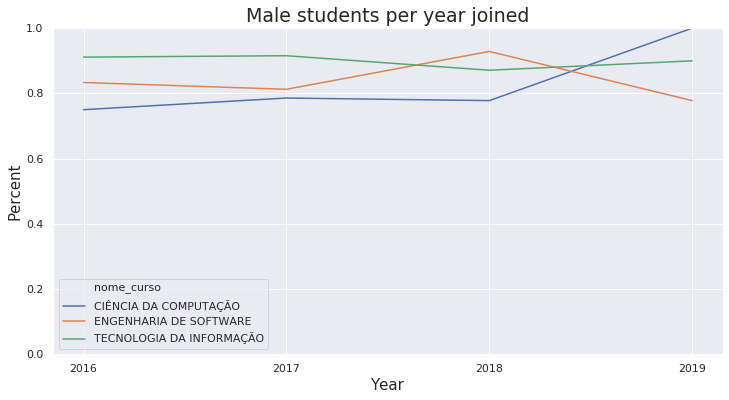

In [0]:
plt.figure(figsize=(12, 6))
plot_it = sns.lineplot(x="ano_ingresso", y="total", hue="nome_curso", data=data_ti_male)
plot_it.set(ylim=(0,1))
plt.xlabel("Year", fontsize=15)
plt.ylabel("Percent", fontsize=15)
plt.title("Male students per year joined", fontsize=19)

## Assesing the diversity at UFRN 

As we can see, the diversity in courses related to BTI is not going well.

But is this the most general reality at UFRN?

We will expand our analysis to consider all academic units at the university.

Again, we start by checking for missing data:

In [0]:
data.isnull().sum()

matricula                  0
nome_discente              0
sexo                       0
ano_ingresso               0
periodo_ingresso         237
forma_ingresso           218
tipo_discente              0
status                     0
sigla_nivel_ensino         0
nivel_ensino               0
id_curso                8633
nome_curso              8633
modalidade_educacao     8633
id_unidade              8633
nome_unidade            8633
id_unidade_gestora      8633
nome_unidade_gestora    8633
dtype: int64

When we identify the absence of data, we can try to fill it out or discard the affected observations.

For the amount of data that is missing, try to fill that data becomes difficult.

Therefore, we will choose to analyze only the cases in which the name of the unit was informed:

In [0]:
data_not_null = data[~data["nome_unidade"].isnull()]

Another important feature is to limit our analysis to undergraduate courses:

In [0]:
data_graduation = data_not_null.query("nivel_ensino == 'GRADUAÇÃO'")

After these filters, let's see how many units are left.

We can do this using the `len` procedure, which counts the number of elements in a list:

In [0]:
unit_names = data_graduation["nome_unidade"].unique()
len(unit_names)

15

In [0]:
unit_names

array(['CENTRO DE  ENSINO SUPERIOR DO SERIDÓ',
       'CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES',
       'CENTRO DE CIÊNCIAS DA SAÚDE',
       'CENTRO DE CIÊNCIAS EXATAS E DA TERRA',
       'ESCOLA DE CIÊNCIAS E TECNOLOGIA',
       'CENTRO DE CIÊNCIAS SOCIAIS APLICADAS',
       'INSTITUTO METROPOLE DIGITAL',
       'FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA',
       'CENTRO DE EDUCAÇÃO', 'ESCOLA DE MÚSICA', 'CENTRO DE TECNOLOGIA',
       'CENTRO DE BIOCIÊNCIAS', 'ESCOLA AGRÍCOLA DE JUNDIAÍ',
       'ESCOLA DE SAÚDE',
       'ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE'],
      dtype=object)

Still in the data validation step, we will see if there is invalid data in the characteristic `sexo`.

We can do this using the `all (condition)` procedure, that evaluates if there has been no break in the reported condition:

In [0]:
sex_condition = data_graduation["sexo"].isin(["M","F"])
all(sex_condition)

False

We then maintain only the valid entries:

In [0]:
data_graduation = data_graduation[sex_condition]

Based on previous experiences, what is the next step in our analysis?

In [0]:
percentage_graduation = pd.crosstab(data_graduation["nome_unidade"], data_graduation["sexo"], normalize="index")
percentage_graduation

sexo,F,M
nome_unidade,,
CENTRO DE ENSINO SUPERIOR DO SERIDÓ,0.480818,0.519182
CENTRO DE BIOCIÊNCIAS,0.554855,0.445145
CENTRO DE CIÊNCIAS DA SAÚDE,0.592482,0.407518
CENTRO DE CIÊNCIAS EXATAS E DA TERRA,0.310626,0.689374
"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",0.494630,0.505370
CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,0.465544,0.534456
CENTRO DE EDUCAÇÃO,0.767246,0.232754
CENTRO DE TECNOLOGIA,0.322049,0.677951
ESCOLA AGRÍCOLA DE JUNDIAÍ,0.381466,0.618534


We will isolate only the data referring to the female public.

In addition, we will sort these values in ascending order using the `sort_values ()` method:

In [0]:
data_female_graduation = percentage_graduation["F"].sort_values()
data_female_graduation

nome_unidade
INSTITUTO METROPOLE DIGITAL                                     0.104198
ESCOLA DE CIÊNCIAS E TECNOLOGIA                                 0.229838
ESCOLA DE MÚSICA                                                0.254808
CENTRO DE CIÊNCIAS EXATAS E DA TERRA                            0.310626
CENTRO DE TECNOLOGIA                                            0.322049
ESCOLA AGRÍCOLA DE JUNDIAÍ                                      0.381466
ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE    0.433594
CENTRO DE CIÊNCIAS SOCIAIS APLICADAS                            0.465544
CENTRO DE  ENSINO SUPERIOR DO SERIDÓ                            0.480818
CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES                      0.494630
CENTRO DE BIOCIÊNCIAS                                           0.554855
CENTRO DE CIÊNCIAS DA SAÚDE                                     0.592482
ESCOLA DE SAÚDE                                                 0.698444
FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAI

The minimum and maximum values for the percentage of women are quite separate.

Let's take a look at descriptive statistics about this series:

In [0]:
data_female_graduation.describe()

count    15.000000
mean      0.453268
std       0.190934
min       0.104198
25%       0.316337
50%       0.465544
75%       0.573668
max       0.767246
Name: F, dtype: float64

The mean and median are close to 50%, which is an interesting data.

However, the standard deviation of 20% is quite high.

Let's see which courses were below the first quartile:

In [0]:
data_female_graduation[data_female_graduation <= data_female_graduation.quantile(0.25)]

nome_unidade
INSTITUTO METROPOLE DIGITAL             0.104198
ESCOLA DE CIÊNCIAS E TECNOLOGIA         0.229838
ESCOLA DE MÚSICA                        0.254808
CENTRO DE CIÊNCIAS EXATAS E DA TERRA    0.310626
Name: F, dtype: float64

In general, they are courses related to exact sciences, engineering and technologies. 

This is a known reality, but it is surprising that music courses are also in this group.

And which ones were above the third quartile?

In [0]:
data_female_graduation[data_female_graduation >= data_female_graduation.quantile(0.75)]

nome_unidade
CENTRO DE CIÊNCIAS DA SAÚDE                          0.592482
ESCOLA DE SAÚDE                                      0.698444
FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA    0.708417
CENTRO DE EDUCAÇÃO                                   0.767246
Name: F, dtype: float64

Courses in the area of health and education, another reality assimilated at the university.

To get the full view, let's use seaborn's `distplot` method to analyze the data distribution and compare it to a normal distribution.

For this, we will need the norm method of the `scipy` library:

In [0]:
from scipy.stats import norm

Text(0.5, 1.0, 'Undergraduate female students by academic unit')

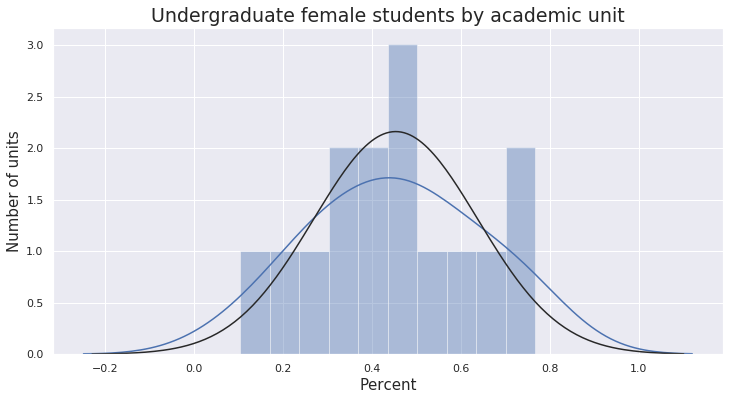

In [0]:
plt.figure(figsize=(12,6))
sns.distplot(data_female_graduation, fit=norm, bins=10)
plt.ylabel("Number of units", fontsize=15)
plt.xlabel("Percent", fontsize=15)
plt.title("Undergraduate female students by academic unit", fontsize=19)

Understanding the code above, the option `fit = norm` generates the normal distribution of reference for comparison, in black.

In turn, the option `bins = 10` configures how many intervals will be considered by the histogram.

Interpreting the graph, we came to the hypothesis that there are three major groups of courses, with only one representing a situation of diversity.

We will try to evaluate this hypothesis with more refinement, starting with an analysis of UFRN courses:

In [0]:
len(data_graduation["nome_curso"].unique())

81

One caveat here: the datasets point to 82 different course names, but there are more than 120 undergraduate courses at UFRN.

The reason for the smaller number is that undergraduate and bachelor's degrees are not distinguished by name in these datasets.

Continuing our analysis:

In [0]:
percentage_courses = pd.crosstab(data_graduation["nome_curso"], data_graduation["sexo"], normalize="index")
percentage_courses

sexo,F,M
nome_curso,,
ADMINISTRAÇÃO,0.421310,0.578690
ADMINISTRAÇÃO PÚBLICA,0.405000,0.595000
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,0.191919,0.808081
ARQUITETURA E URBANISMO,0.680451,0.319549
ARTES VISUAIS,0.585551,0.414449
...,...,...
SISTEMAS DE INFORMAÇÃO,0.163194,0.836806
TEATRO,0.452586,0.547414
TECNOLOGIA DA INFORMAÇÃO,0.104198,0.895802


Selecting only the data for the female public and ordering them:

In [0]:
data_female_courses = percentage_courses["F"].sort_values()
data_female_courses

nome_curso
TECNOLOGIA DA INFORMAÇÃO          0.104198
ENGENHARIA DE TELECOMUNICAÇÕES    0.117647
ENGENHARIA MECATRÔNICA            0.139535
ENGENHARIA DE SOFTWARE            0.155844
ENGENHARIA DE COMPUTAÇÃO          0.159664
                                    ...   
PEDAGOGIA                         0.778998
NUTRIÇÃO                          0.791506
FONOAUDIOLOGIA                    0.852140
SERVIÇO SOCIAL                    0.874372
LETRAS -                          0.875000
Name: F, Length: 81, dtype: float64

Again, courses in engineering, technology, health and education appear as the least diverse.

Let's look at some descriptive statistics for this series:

In [0]:
data_female_courses.describe()

count    81.000000
mean      0.461842
std       0.194056
min       0.104198
25%       0.321608
50%       0.452586
75%       0.604478
max       0.875000
Name: F, dtype: float64

Again, the mean and standard deviation are close to 50% and the standard deviation is around 20%.

Let's see which courses are below the first quartile:

In [0]:
data_female_courses[data_female_courses <= data_female_courses.quantile(0.25)]

nome_curso
TECNOLOGIA DA INFORMAÇÃO                 0.104198
ENGENHARIA DE TELECOMUNICAÇÕES           0.117647
ENGENHARIA MECATRÔNICA                   0.139535
ENGENHARIA DE SOFTWARE                   0.155844
ENGENHARIA DE COMPUTAÇÃO                 0.159664
SISTEMAS DE INFORMAÇÃO                   0.163194
ENGENHARIA ELÉTRICA                      0.164407
ENGENHARIA MECÂNICA                      0.173913
CIÊNCIA DA COMPUTAÇÃO                    0.178571
FÍSICA                                   0.189614
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS    0.191919
CIÊNCIAS ECONÔMICAS                      0.227929
CIÊNCIAS E TECNOLOGIA                    0.229838
MÚSICA                                   0.254808
MATEMÁTICA                               0.255086
ENGENHARIA CIVIL                         0.274194
EDUCAÇÃO FÍSICA                          0.309877
ENGENHARIA DE PRODUÇÃO                   0.311419
CIÊNCIAS ATUARIAIS                       0.316406
ENGENHARIA AGRONÔMICA                  

In fact, the only new insight we get is the presence of the
physical education in this group, an exception among health courses.

Now let's see the courses above the third quartile:

In [0]:
data_female_courses[data_female_courses >= data_female_courses.quantile(0.75)]

nome_curso
LETRAS                                    0.604478
BIBLIOTECONOMIA                           0.609977
ODONTOLOGIA                               0.615527
DANÇA                                     0.617647
LETRAS - LÍNGUA PORTUGUESA                0.626357
LETRAS- LÍNGUA ESPANHOLA E LITERATURAS    0.628000
BIOMEDICINA                               0.645740
FISIOTERAPIA                              0.661017
PSICOLOGIA                                0.677716
SAÚDE COLETIVA                            0.680000
ARQUITETURA E URBANISMO                   0.680451
GESTÃO HOSPITALAR                         0.698444
LETRAS - LÍNGUA ESPANHOLA                 0.702020
LETRAS - PORTUGUÊS E INGLÊS               0.720000
ENFERMAGEM                                0.753219
LETRAS - LÍNGUA PORTUGUESA E LIBRAS       0.759615
PEDAGOGIA                                 0.778998
NUTRIÇÃO                                  0.791506
FONOAUDIOLOGIA                            0.852140
SERVIÇO SOCIAL      

Here we see one more exception, with architecture and urbanism in this group.

In addition, the presence of courses in Literature draws attention, considering that its responsible unit has an almost equal proportion between male and female students.

Finally, we will use the `distplot` and compare the data distribution with a normal distribution:

Text(0.5, 1.0, 'Undergraduate female students per course')

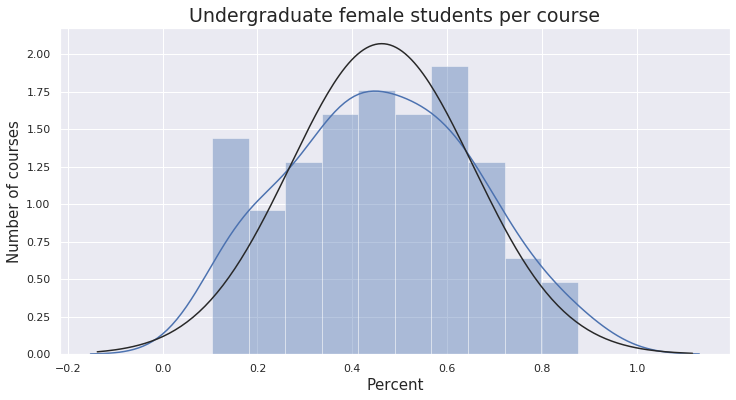

In [0]:
plt.figure(figsize=(12,6))
sns.distplot(data_female_courses, fit=norm, bins=10)
plt.ylabel("Number of courses", fontsize=15)
plt.xlabel("Percent", fontsize=15)
plt.title("Undergraduate female students per course", fontsize=19)

In this case, we notice a distribution much closer to normal.

However, there is a considerable peak at the lower end of the x-axis.

Overall, we can say that diversity at the university is better off than diversity at university courses.

In other words, different profiles will find courses to suit them, but few courses will meet different profiles.